In [247]:
%load_ext autoreload
%autoreload 2

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import BlockRNNModel, RNNModel
from darts.datasets import SunspotsDataset
from darts.metrics.metrics import mae, rmse, mape, smape
import wandb

RANDOM_STATE = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
series = SunspotsDataset().load()
train, val = series.split_after(0.80)

In [249]:
scaler_transformer = Scaler()
train = scaler_transformer.fit_transform(train)
val = scaler_transformer.transform(val)
series = scaler_transformer.transform(series)

In [250]:
# lstm_model = RNNModel(model = "LSTM",
#                       input_chunk_length = 30,
#                       hidden_dim = 36,
#                       n_rnn_layers = 2,
#                       dropout = 0,
#                       training_length = 31,
#                       batch_size = 32,
#                       n_epochs = 50,
#                       model_name = "sun_rnn_t1",
#                       # work_dir = "../artifacts",
#                       # log_tensorboard = True,
#                       nr_epochs_val_period = 1,
#                       # save_checkpoints = True,
#                       force_reset=True,
#                       random_state = 42,
#                       show_warnings = True,
#                       )


In [260]:
config_dict = {
    "model" : "LSTM",
    "input_chunk_length" : 50,
    "output_chunk_length" : 1,
    "hidden_dim" : 64,
    "n_rnn_layers" : 1,
    "batch_size" : 64,
    "dropout" : 0.1,
    "use_reversible_instance_norm" : False,
    "n_epochs" : 100,
    "model_name" : "sun_test",
    "lr" : 1e-3
}
wandb.init(project="SunSpotTimeSeries", name="sun_test_2", config=config_dict)

In [261]:
lstm_model = BlockRNNModel(
    model = config_dict["model"],
    input_chunk_length = config_dict["input_chunk_length"],
    output_chunk_length = config_dict["output_chunk_length"],
    hidden_dim = config_dict["hidden_dim"],
    n_rnn_layers = config_dict["n_rnn_layers"],
    batch_size = config_dict["batch_size"],
    dropout = config_dict["dropout"],
    use_reversible_instance_norm = config_dict["use_reversible_instance_norm"],
    n_epochs = config_dict["n_epochs"],
    model_name = config_dict["model_name"],
    optimizer_kwargs={"lr": config_dict["lr"]},
    nr_epochs_val_period=1,
    random_state=42,
    work_dir = "../artifacts",
    force_reset=True,
    show_warnings=True,
    save_checkpoints=True,
    log_tensorboard=True,
)

In [262]:
lstm_model.fit(train, 
               val_series=val, 
               verbose=True)

D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 17.2 K | train
6 | fc              | Sequential       | 65     | train
-----------------------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

D:\TimeSeries\StockTimeSeries\.timeenv\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (35) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


BlockRNNModel(output_chunk_shift=0, model=LSTM, hidden_dim=64, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.1, activation=ReLU, input_chunk_length=50, output_chunk_length=1, batch_size=64, use_reversible_instance_norm=False, n_epochs=100, model_name=sun_test, optimizer_kwargs={'lr': 0.001}, nr_epochs_val_period=1, random_state=42, work_dir=../artifacts, force_reset=True, show_warnings=True, save_checkpoints=True, log_tensorboard=True)

In [263]:
pred = lstm_model.historical_forecasts(
    series,
    start=train.shape[0],
    forecast_horizon=1,
    stride=1,
    retrain=False,
    last_points_only=True,
    verbose=True,
    show_warnings = True,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [264]:
evals = lstm_model.backtest(
    series = series,
    last_points_only=True,
    historical_forecasts = pred,
    metric = [mae, rmse, mape, smape]
)
metrics = {
    'MAE': evals[0],
    'RMSE': evals[1],
    'MAPE': evals[2],
    'SMAPE': evals[3]
}
wandb.log(metrics)

In [265]:
metrics

{'MAE': 0.05534920074669708,
 'RMSE': 0.07710840325564544,
 'MAPE': 34.21620348744708,
 'SMAPE': 27.620945913911367}

<Axes: title={'center': 'pred'}, xlabel='time'>

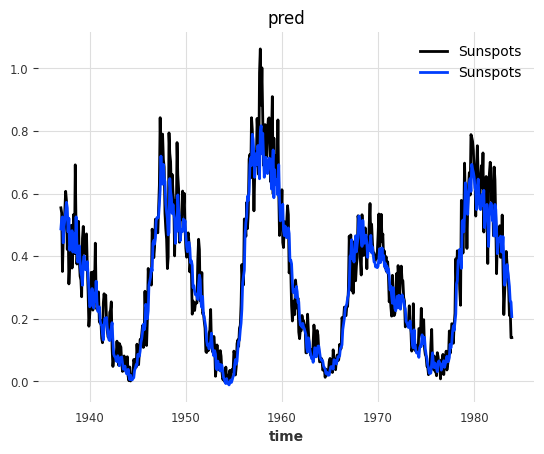

In [266]:
val.plot(title="val")
pred.plot(title="pred")

In [267]:
wandb.finish()

MAE,▁
MAPE,▁
RMSE,▁
SMAPE,▁
MAE,0.05535
MAPE,34.2162
RMSE,0.07711
SMAPE,27.62095


In [258]:
# pred = lstm_model.predict(val.shape[0])

# plot_series(
#     [
#         # train.pd_series(),                      
#         (val.pd_series(), train.pd_series().shape[0]),                                  
#         ([pred.pd_series()], 'overlapping', train.pd_series().shape[0]) 
#     ],
#     colors=['blue', 'red', 'green'],
#     labels=['Training', 'Validation', 'Validation Prediction']
# )

# val.plot()
# pred.plot()

# evaluate(val, pred)